In [1]:
import os
import pandas as pd
import numpy as np

In [11]:
import sklearn.model_selection as model_selection

In [13]:
import sklearn.tree as tree

In [17]:
import sklearn.metrics as metrics

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [112]:
from xgboost import XGBClassifier

In [ ]:
# Decision Tree Classifier

In [2]:
df = pd.read_csv('credit_history.csv')
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [3]:
df.shape

(7727, 7)

In [4]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
df['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [6]:
df['years'].fillna(4,inplace=True)

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,default,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,0,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,0,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,1,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [10]:
X = df.drop('default',axis=1)
y = df['default']

In [12]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [15]:
clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=200)

In [16]:
clf.score(Xtest, ytest)

0.6144890038809832

In [20]:
metrics.roc_auc_score(ytest,clf.predict_proba(Xtest)[:,1])

0.6569529472326883

In [21]:
import pydotplus
import graphviz

In [22]:
os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['0','1'],
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [28]:
graph = graphviz.Source(dot_data, format='png')

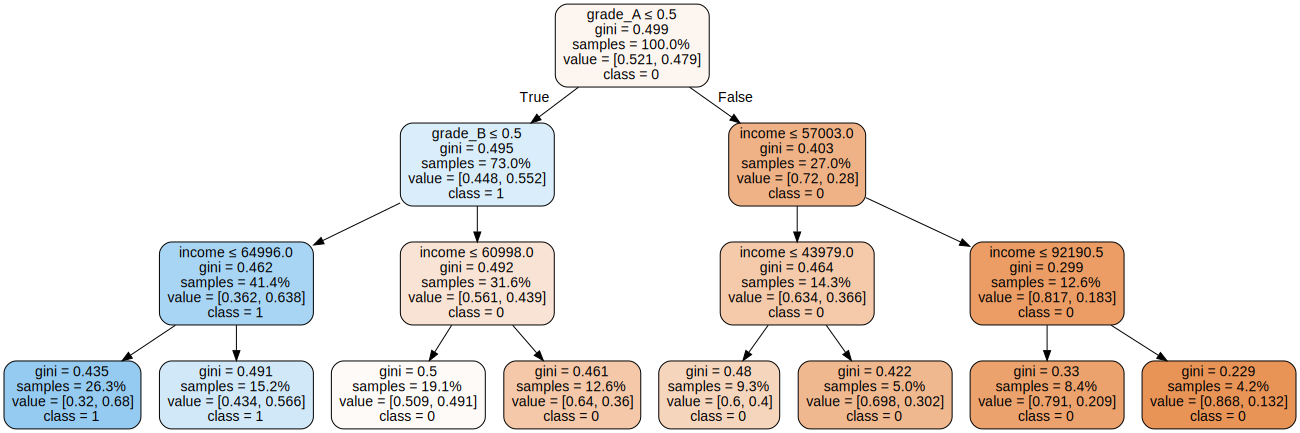

In [29]:
graph

In [30]:
graph.render('dt_classifier',view=True)

'dt_classifier.png'

In [35]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [40]:
mod = model_selection.GridSearchCV(clf, param_grid={'max_depth':[2,3,4,5],\
                                                    'criterion':['gini', 'entropy'],\
                                                    'max_leaf_nodes': list(range(2, 100)),\
                                                    'min_samples_split': [2, 3, 4]})

In [41]:
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [42]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=13, random_state=200)

In [43]:
mod.best_score_

0.6371136191799243

In [45]:
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=13,random_state=200)

In [47]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=13, random_state=200)

In [48]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['0','1'],
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [49]:
graph = graphviz.Source(dot_data, format='png')

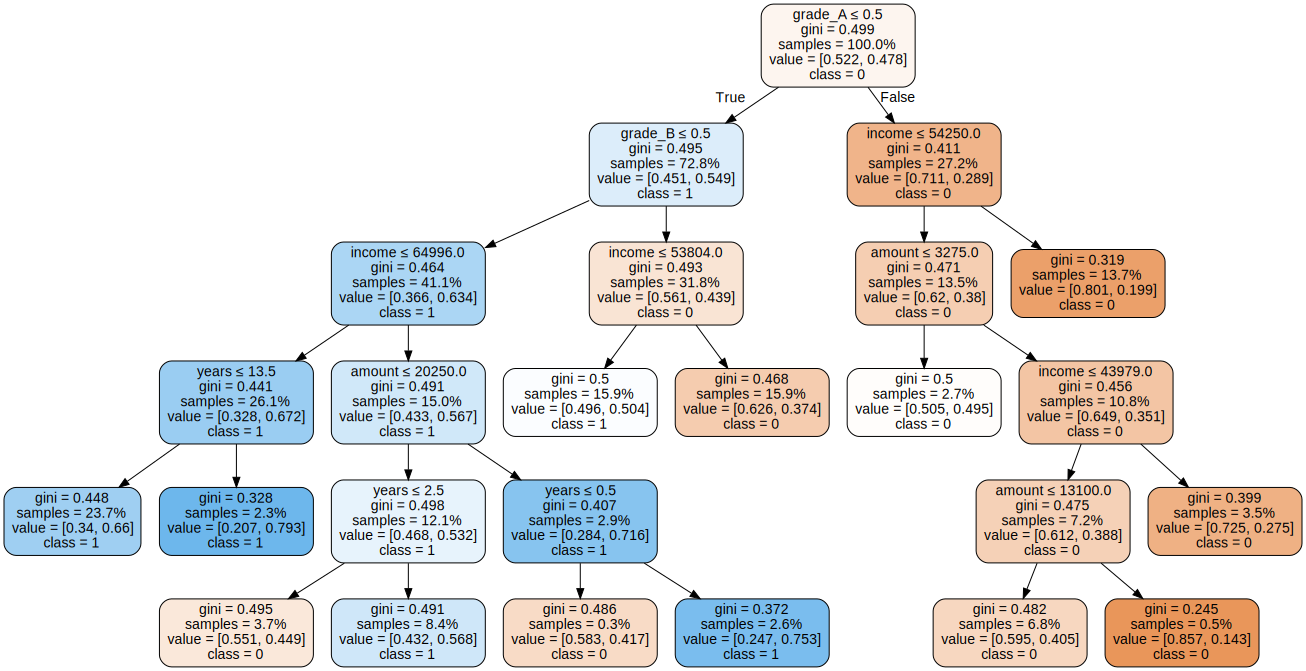

In [50]:
graph

In [51]:
graph.render('dt_classifier',view=True)

'dt_classifier.png'

In [ ]:
# Decision Tree Regressor

In [52]:
dat = pd.read_csv('dm.csv')
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [53]:
dat = pd.get_dummies(dat)

In [54]:
dat.head()

,Salary,Children,Catalogs,AmountSpent,Cust_Id,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,755,247,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1318,127,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,296,479,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,2436,475,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1304,151,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [55]:
X = dat.drop(['Cust_Id','AmountSpent'],axis=1)
y = dat['AmountSpent']

In [56]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
reg = tree.DecisionTreeRegressor(max_depth=3, random_state=300)

In [58]:
reg.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3, random_state=300)

In [59]:
reg.score(Xtest,ytest)

0.5779562292959421

In [60]:
reg.feature_importances_

array([0.70483259, 0.        , 0.18065203, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03196313, 0.08255225])

In [63]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head()

Salary            0.704833
Catalogs          0.180652
History_Medium    0.082552
History_Low       0.031963
Age_Middle        0.000000
dtype: float64

In [64]:
dot_data = tree.export_graphviz(reg, out_file=None,
                               feature_names=X.columns,
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [65]:
graph = graphviz.Source(dot_data, format='png')

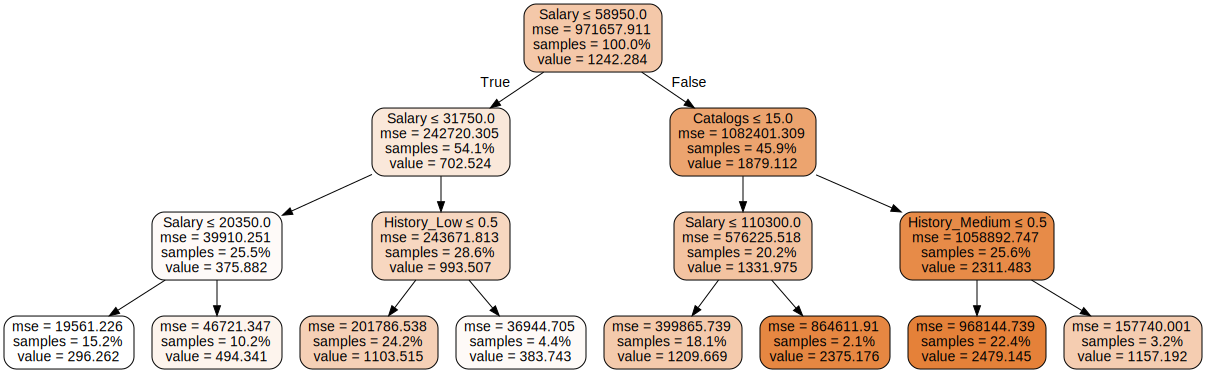

In [66]:
graph

In [67]:
graph.render('dt_regressor',view=True)

'dt_regressor.png'

In [ ]:
# Ensemble Classifier

In [ ]:
## Bagged Tree Ensembles and Random Forests

In [70]:
os.chdir(r'C:\Users\Swastik\Desktop\Dono Consulting\Deloitte_Training\ensemble')

In [71]:
hr = pd.read_csv('HR_comma_sep.csv')

In [72]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [74]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [75]:
hr.rename(columns={'sales':'dept'},inplace=True)

In [76]:
hr = pd.get_dummies(hr)

In [77]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
X = hr.drop('left',axis=1)
y = hr['left']

In [79]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
clf_bag = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=20, \
                            oob_score=True, n_jobs=-1, random_state=400)

In [84]:
clf_bag.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=400)

In [86]:
clf_bag.oob_score_

0.9879989999166597

In [88]:
clf_bag.score(Xtest,ytest)

0.9843333333333333

In [89]:
for w in range(10,300,20):
    clf_bag = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=w,
                                oob_score=True, n_jobs=-1, random_state=400)
    clf_bag.fit(Xtrain,ytrain)
    print('For estimators = '+str(w)+' OOB Score is '+str(clf_bag.oob_score_))
    print('********************************************************')

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


For estimators = 10 OOB Score is 0.9833319443286941
********************************************************
For estimators = 30 OOB Score is 0.9889157429785815
********************************************************
For estimators = 50 OOB Score is 0.9899158263188599
********************************************************
For estimators = 70 OOB Score is 0.9897491457621469
********************************************************
For estimators = 90 OOB Score is 0.9899158263188599
********************************************************
For estimators = 110 OOB Score is 0.9897491457621469
********************************************************
For estimators = 130 OOB Score is 0.9899991665972164
********************************************************
For estimators = 150 OOB Score is 0.9902491874322861
********************************************************
For estimators = 170 OOB Score is 0.990082506875573
********************************************************
For estimators =

In [90]:
clf_bag = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=150,
                                oob_score=True, n_jobs=-1, random_state=400)
clf_bag.fit(Xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  n_jobs=-1, oob_score=True, random_state=400)

In [92]:
clf_bag.estimators_

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [94]:
clf_bag.estimators_[0].feature_importances_

array([5.14863744e-01, 1.41749755e-01, 9.92687660e-02, 7.54975997e-02,
       1.44979170e-01, 2.09312564e-03, 3.48839050e-04, 1.44983732e-03,
       6.95395869e-05, 7.33445906e-04, 2.10898998e-04, 3.81488064e-04,
       4.33463425e-04, 2.03841291e-04, 2.78375207e-03, 4.45495797e-03,
       4.38896803e-03, 9.48295487e-04, 2.37785594e-03, 2.76265615e-03])

In [95]:
imp = []

for i in clf_bag.estimators_:
    imp.append(i.feature_importances_)

imp = np.mean(imp, axis=0)

In [96]:
imp

array([5.03553961e-01, 1.41791250e-01, 1.02900494e-01, 8.79797227e-02,
       1.40795962e-01, 1.51792729e-03, 1.49853311e-04, 1.37460484e-03,
       7.43382500e-04, 1.19185487e-03, 9.23901775e-04, 5.97506368e-04,
       7.29613671e-04, 4.94469442e-04, 2.10769953e-03, 2.27604634e-03,
       3.62761044e-03, 1.86473425e-03, 2.99284008e-03, 2.38656601e-03])

In [97]:
feature_importance = pd.Series(imp, index=X.columns.tolist())

In [98]:
feature_importance

satisfaction_level       0.503554
last_evaluation          0.141791
number_project           0.102900
average_montly_hours     0.087980
time_spend_company       0.140796
Work_accident            0.001518
promotion_last_5years    0.000150
dept_IT                  0.001375
dept_RandD               0.000743
dept_accounting          0.001192
dept_hr                  0.000924
dept_management          0.000598
dept_marketing           0.000730
dept_product_mng         0.000494
dept_sales               0.002108
dept_support             0.002276
dept_technical           0.003628
salary_high              0.001865
salary_low               0.002993
salary_medium            0.002387
dtype: float64

<AxesSubplot:>

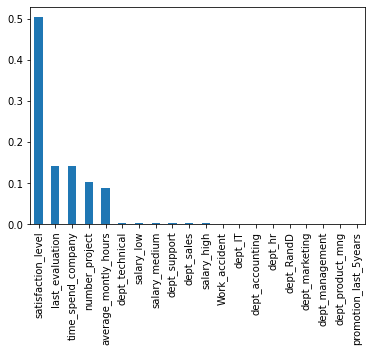

In [100]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [102]:
clf_rf = RandomForestClassifier(n_estimators=80, \
                                oob_score=True, n_jobs=-1, random_state=400)

In [103]:
clf_rf.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [104]:
clf_rf.score(Xtest,ytest)

0.9876666666666667

In [105]:
clf_rf.oob_score_

0.9912492707725644

In [107]:
for w in range(10,300,20):
    clf_rf = RandomForestClassifier(n_estimators=w,oob_score=True, n_jobs=-1, random_state=400)
    clf_rf.fit(Xtrain,ytrain)
    print('For estimators = '+str(w)+' OOB Score is '+str(clf_rf.oob_score_))
    print('********************************************************')

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


For estimators = 10 OOB Score is 0.9816651387615635
********************************************************
For estimators = 30 OOB Score is 0.9894991249270773
********************************************************
For estimators = 50 OOB Score is 0.9904992082673556
********************************************************
For estimators = 70 OOB Score is 0.9907492291024252
********************************************************
For estimators = 90 OOB Score is 0.9910825902158513
********************************************************
For estimators = 110 OOB Score is 0.9912492707725644
********************************************************
For estimators = 130 OOB Score is 0.9911659304942079
********************************************************
For estimators = 150 OOB Score is 0.9912492707725644
********************************************************
For estimators = 170 OOB Score is 0.9912492707725644
********************************************************
For estimators 

In [108]:
clf_rf = RandomForestClassifier(n_estimators=230, \
                                oob_score=True, n_jobs=-1, random_state=400)
clf_rf.fit(X,y)

RandomForestClassifier(n_estimators=230, n_jobs=-1, oob_score=True,
                       random_state=400)

In [109]:
clf_rf.oob_score_

0.9919994666311087

<AxesSubplot:>

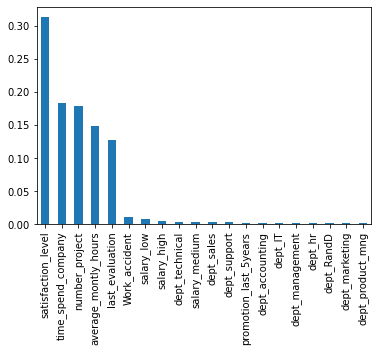

In [110]:
imp = []

for i in clf_rf.estimators_:
    imp.append(i.feature_importances_)

imp = np.mean(imp, axis=0)

feature_importance = pd.Series(imp, index=X.columns.tolist())

feature_importance.sort_values(ascending=False).plot(kind='bar')

In [ ]:
## Boosting

In [113]:
clf = GradientBoostingClassifier(n_estimators=80,random_state=400)

In [114]:
clf.fit(Xtrain,ytrain)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [115]:
clf.score(Xtest,ytest)

0.974

In [116]:
mod = model_selection.GridSearchCV(clf, param_grid={'n_estimators':[60,80,100,120,180,200]})

In [117]:
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=400),
             param_grid={'n_estimators': [60, 80, 100, 120, 180, 200]})

In [118]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=180, random_state=400)

In [119]:
clf = GradientBoostingClassifier(n_estimators=180,random_state=400)
clf.fit(Xtrain,ytrain)

GradientBoostingClassifier(n_estimators=180, random_state=400)

In [120]:
clf.score(Xtest,ytest)

0.9753333333333334

In [127]:
clf.feature_importances_

array([5.49582660e-01, 9.52427298e-02, 1.06546199e-01, 7.10287862e-02,
       1.73666252e-01, 1.29479702e-03, 1.49884358e-05, 1.91931081e-04,
       8.67030385e-05, 8.02928302e-05, 8.90020734e-06, 2.34257740e-05,
       0.00000000e+00, 1.46835895e-04, 8.72349042e-05, 2.22757103e-04,
       1.92645215e-04, 5.04725905e-04, 1.06911538e-03, 9.01945988e-06])

<AxesSubplot:>

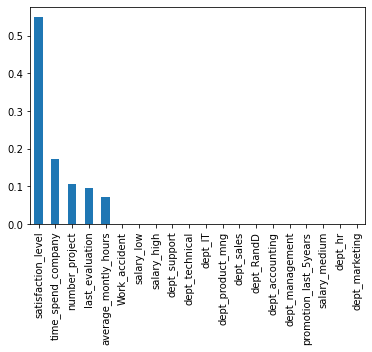

In [128]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns.tolist())

feature_importance.sort_values(ascending=False).plot(kind='bar')

In [129]:
clf = AdaBoostClassifier(n_estimators=80,random_state=400)

In [130]:
clf.fit(Xtrain,ytrain)

AdaBoostClassifier(n_estimators=80, random_state=400)

In [131]:
clf.score(Xtest,ytest)

0.9603333333333334

In [132]:
mod = model_selection.GridSearchCV(clf, param_grid={'n_estimators':[60,80,100,120,180,200],
                                                   'learning_rate':np.arange(0.1,1,0.3)})

In [133]:
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=80, random_state=400),
             param_grid={'learning_rate': array([0.1, 0.4, 0.7]),
                         'n_estimators': [60, 80, 100, 120, 180, 200]})

In [134]:
mod.best_estimator_

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80,
                   random_state=400)

In [135]:
clf = AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80, random_state=400)
clf.fit(Xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80,
                   random_state=400)

In [136]:
clf.score(Xtest,ytest)

0.9613333333333334

<AxesSubplot:>

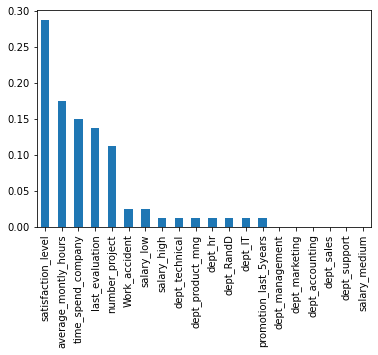

In [137]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns.tolist())

feature_importance.sort_values(ascending=False).plot(kind='bar')

In [138]:
clf = XGBClassifier(n_estimators=80, random_state=400)

In [139]:
clf.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
mod = model_selection.GridSearchCV(clf, param_grid={'n_estimators':[60,80,100,120,180,200]})

In [141]:
mod.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=80,
                                     n_jobs=8, num_parallel_tree=1,
                                     predictor='auto', random_state=400,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                             

In [143]:
mod.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
clf = XGBClassifier(n_estimators=180, random_state=400)

In [145]:
clf.fit(Xtrain,ytrain)

[15:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=400,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
clf.score(Xtest,ytest)

0.988

<AxesSubplot:>

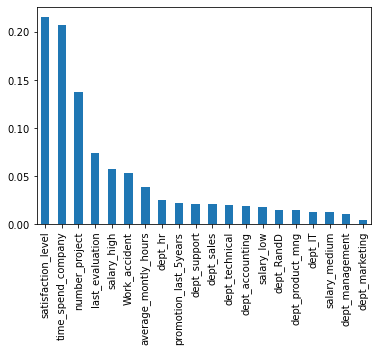

In [147]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns.tolist())

feature_importance.sort_values(ascending=False).plot(kind='bar')